In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def to_std_float(image):
    """Converts image to 0 to 1 float to avoid wrapping that occurs with uint8"""
    image.astype(np.float16, copy=False)
    image = np.multiply(image, 1/255)
    return image

def to_std_uint8(image):
    """Properly handles the conversion to uint8"""
    image = cv2.convertScaleAbs(image, alpha=255)
    return image

def display_image(image, title='Image'):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.title(title)
    plt.show()

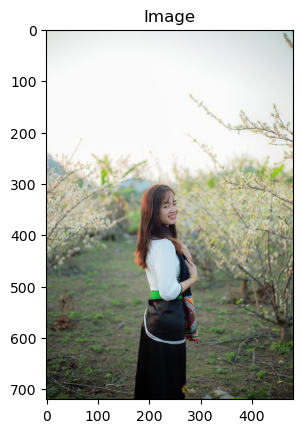

In [2]:
original_image = cv2.imread('../images/face_unlabeled_face_unlabeled_addnoise_eps16_testnum0_00000169.jpg.jpg')
display_image(original_image)

# Salt-and-pepper noise

## Creating salt-and-pepper noise

In [3]:
def add_salt_and_pepper(image, noise_prob=0.1, show=True):
    """Converts pixels of `image` to black or white independently each with probability `noise_prob`"""
    image = to_std_float(image)
    white_value = int(2 / noise_prob)
    noise = np.random.randint(white_value + 1, size=(image.shape[0], image.shape[1], 1))
    image = np.where(noise == 0, 0, image)
    image = np.where(noise == white_value, 1, image)
    image = to_std_uint8(image)
    if show:
        display_image(image, 'Image with Salt & Pepper Noise')
    return image

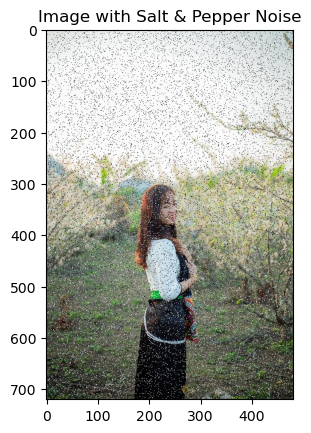

In [4]:
salt_and_pepper_image = add_salt_and_pepper(original_image)

## Median blur

In [5]:
def show_median_blur(image, kernel_size=3, title ='Median Blur Result'):
    image = cv2.medianBlur(image, kernel_size)
    display_image(image, title)
    return image

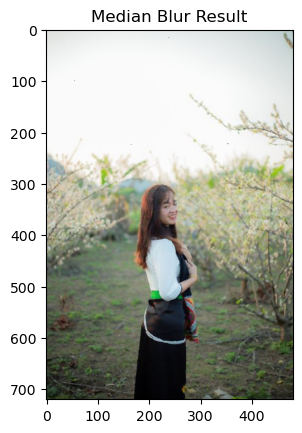

array([[[220, 223, 221],
        [220, 223, 221],
        [220, 223, 221],
        ...,
        [145, 133, 127],
        [145, 133, 127],
        [202, 187, 184]],

       [[220, 223, 221],
        [220, 223, 221],
        [220, 223, 221],
        ...,
        [147, 148, 138],
        [156, 150, 143],
        [202, 187, 184]],

       [[220, 223, 221],
        [220, 223, 221],
        [220, 223, 221],
        ...,
        [180, 175, 166],
        [177, 163, 157],
        [177, 163, 157]],

       ...,

       [[ 19,  47,  34],
        [ 22,  50,  37],
        [ 19,  51,  40],
        ...,
        [ 51,  50,  52],
        [ 50,  49,  51],
        [ 46,  48,  49]],

       [[ 12,  45,  34],
        [ 30,  60,  49],
        [ 33,  65,  54],
        ...,
        [ 51,  50,  52],
        [ 50,  49,  51],
        [ 50,  49,  51]],

       [[ 21,  55,  44],
        [ 21,  55,  44],
        [ 33,  65,  54],
        ...,
        [ 50,  49,  51],
        [ 52,  51,  53],
        [ 60,  59,  61]]

In [6]:
show_median_blur(salt_and_pepper_image)

# Gaussian noise

## Creating Gaussian noise

In [7]:
def add_gaussian_noise(image, std_dev=0.15, show=True):
    image = to_std_float(image)
    noise = np.random.normal(0, std_dev, (image.shape[0],image.shape[1], 3))
    image += noise
    image = to_std_uint8(image)
    if show:
        display_image(image, 'Image with Gaussian Noise')
    return image

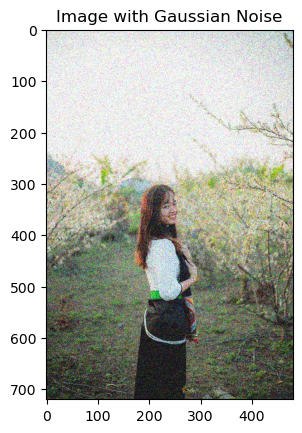

In [8]:
gaussian_noise_image = add_gaussian_noise(original_image)

## Mean filtering

In [9]:
def show_mean_blur(image, kernel_size=(5, 5), title ='Mean Filter Result'):
    image = cv2.blur(image, kernel_size)
    display_image(image, title)
    return image

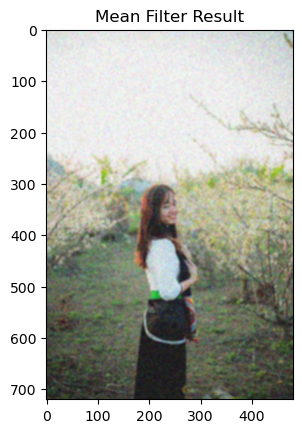

array([[[192, 215, 216],
        [191, 215, 217],
        [204, 222, 211],
        ...,
        [168, 179, 162],
        [157, 163, 147],
        [148, 153, 132]],

       [[198, 215, 214],
        [195, 216, 217],
        [207, 223, 216],
        ...,
        [169, 177, 161],
        [161, 154, 146],
        [151, 147, 130]],

       [[202, 214, 217],
        [199, 217, 219],
        [210, 220, 217],
        ...,
        [175, 172, 160],
        [162, 150, 146],
        [154, 141, 135]],

       ...,

       [[ 51,  55,  49],
        [ 50,  59,  50],
        [ 50,  55,  45],
        ...,
        [ 60,  48,  43],
        [ 56,  53,  48],
        [ 58,  55,  50]],

       [[ 54,  58,  48],
        [ 53,  59,  50],
        [ 53,  55,  46],
        ...,
        [ 72,  52,  42],
        [ 65,  57,  47],
        [ 66,  59,  47]],

       [[ 51,  58,  43],
        [ 50,  57,  43],
        [ 52,  54,  41],
        ...,
        [ 70,  50,  36],
        [ 59,  53,  38],
        [ 61,  57,  38]]

In [10]:
show_mean_blur(gaussian_noise_image)

## Gaussian smoothing

In [11]:
def show_gaussian_blur(image, kernel_size=(5, 5), std_dev=0, title ='Gaussian Smoothing Result'):
    image = cv2.GaussianBlur(image, kernel_size, std_dev)
    display_image(image, title)
    return image

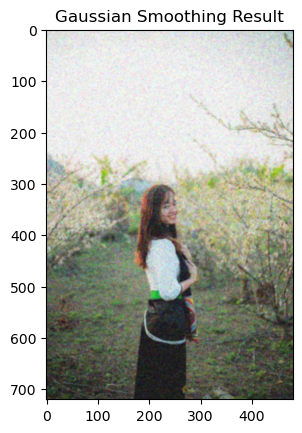

array([[[196, 212, 199],
        [199, 210, 206],
        [205, 209, 218],
        ...,
        [155, 169, 144],
        [163, 154, 146],
        [173, 150, 154]],

       [[191, 214, 203],
        [194, 213, 211],
        [203, 215, 223],
        ...,
        [157, 168, 146],
        [157, 154, 141],
        [163, 151, 146]],

       [[187, 219, 210],
        [191, 220, 218],
        [201, 225, 230],
        ...,
        [164, 162, 149],
        [149, 147, 133],
        [146, 147, 130]],

       ...,

       [[ 56,  65,  38],
        [ 54,  60,  43],
        [ 48,  49,  50],
        ...,
        [ 58,  56,  53],
        [ 54,  55,  51],
        [ 54,  55,  48]],

       [[ 56,  60,  36],
        [ 53,  59,  43],
        [ 48,  56,  56],
        ...,
        [ 67,  58,  41],
        [ 65,  55,  39],
        [ 66,  52,  37]],

       [[ 56,  56,  36],
        [ 52,  58,  45],
        [ 48,  61,  61],
        ...,
        [ 71,  58,  35],
        [ 72,  55,  35],
        [ 75,  50,  35]]

In [12]:
show_gaussian_blur(gaussian_noise_image)

## Median blur

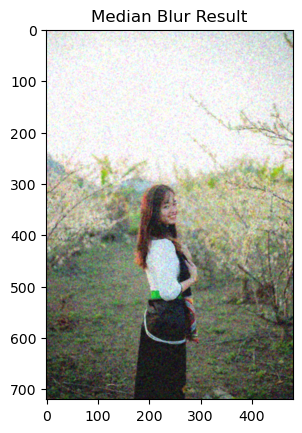

array([[[195, 201, 167],
        [206, 201, 199],
        [206, 196, 218],
        ...,
        [173, 132, 149],
        [196, 121, 149],
        [205, 121, 165]],

       [[190, 219, 167],
        [201, 210, 201],
        [204, 198, 229],
        ...,
        [173, 142, 149],
        [191, 132, 135],
        [196, 142, 149]],

       [[190, 225, 195],
        [201, 225, 227],
        [201, 229, 241],
        ...,
        [173, 142, 146],
        [191, 142, 135],
        [192, 175, 135]],

       ...,

       [[ 61,  69,  19],
        [ 61,  69,  49],
        [ 44,  58,  57],
        ...,
        [ 55,  64,  48],
        [ 55,  51,  34],
        [ 55,  51,  19]],

       [[ 61,  54,  19],
        [ 58,  58,  41],
        [ 33,  58,  56],
        ...,
        [ 64,  49,  41],
        [ 64,  49,  34],
        [ 46,  37,  19]],

       [[ 69,  54,  36],
        [ 31,  58,  41],
        [ 31,  58,  86],
        ...,
        [ 47,  44,  41],
        [ 84,  44,  41],
        [127,  28,  57]]

In [13]:
show_median_blur(gaussian_noise_image)